# NeuroPredict
## EEG Seizure Classification

### Exploratory Data Analysis

In this notebook, we will explore the **Epileptic Seizure Recognition** dataset to understand the characteristics of EEG signals associated with different medical states. This analysis will serve as a foundation for feature engineering and model development in subsequent stages of the project.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [2]:
# Load the dataset
data_path = '/home/aheggs/code/y01a-BG/NeuroPredict/data.csv'
df = pd.read_csv(data_path)

In [3]:
# Display the first few rows
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
1,-167,-230,-280,-315,-338,-369,-405,-392,-298,-140,...,423,434,416,374,319,268,215,165,103,1
2,-24,-15,-5,-1,4,3,6,10,11,7,...,32,35,36,34,32,26,23,18,20,2
3,-135,-133,-125,-118,-111,-105,-102,-93,-94,-90,...,-49,-39,-35,-29,-10,4,21,31,37,3
4,39,41,41,42,43,43,46,47,49,50,...,43,41,41,43,43,40,41,41,49,2


## Data Overview

In [4]:
# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 6894 rows and 179 columns.


In [5]:
# Check for missing values
df.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

### Class Distribution

In [6]:
# Understand the distribution of classes
class_counts = df['y'].value_counts()
print(class_counts)

y
1    2298
2    2298
3    2298
Name: count, dtype: int64


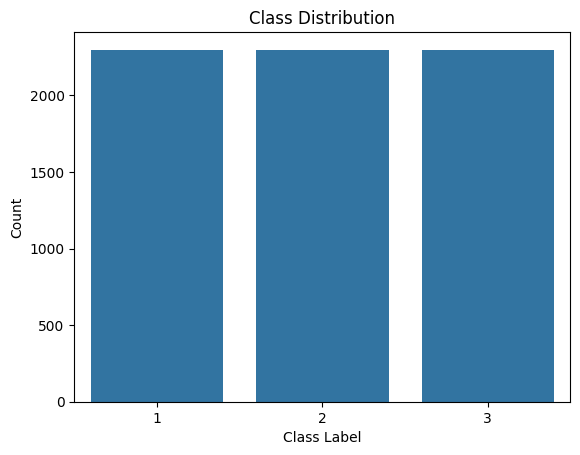

In [7]:
# Plot the class distribution
sns.countplot(x='y', data=df)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

### Data Description

In [8]:
# Get basic statistics
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,...,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.00000,6894.000000,6894.000000
mean,-13.016246,-12.222512,-11.153612,-9.562663,-7.610966,-5.748332,-4.569771,-4.668988,-4.380766,-3.654627,...,-10.533652,-12.729330,-14.783000,-15.945605,-15.419060,-14.976936,-14.494198,-14.09385,-13.743980,2.000000
std,208.206936,208.650092,205.193264,202.156777,201.848048,202.304529,202.511809,203.392075,203.329704,201.254439,...,206.895233,208.838012,212.046259,212.080414,210.388171,206.375914,204.502238,204.44473,207.058656,0.816556
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.00000,-1829.000000,1.000000
25%,-64.000000,-63.000000,-63.000000,-63.000000,-62.000000,-62.000000,-61.000000,-62.000000,-62.000000,-61.000000,...,-63.000000,-64.000000,-65.000000,-65.000000,-65.000000,-64.000000,-64.000000,-63.00000,-63.000000,1.000000
50%,-8.000000,-7.000000,-8.000000,-7.000000,-8.000000,-8.000000,-7.000000,-8.000000,-7.000000,-7.000000,...,-10.000000,-10.000000,-11.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,2.000000
75%,40.000000,41.000000,42.000000,43.000000,43.000000,43.000000,43.000000,45.000000,45.750000,45.750000,...,39.000000,39.000000,39.000000,40.000000,41.000000,39.000000,40.000000,39.00000,39.000000,3.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.00000,1915.000000,3.000000


## Visualizing EEG Signals

Let's visualize some of the EEG signals from different classes to observe any noticeable patterns.

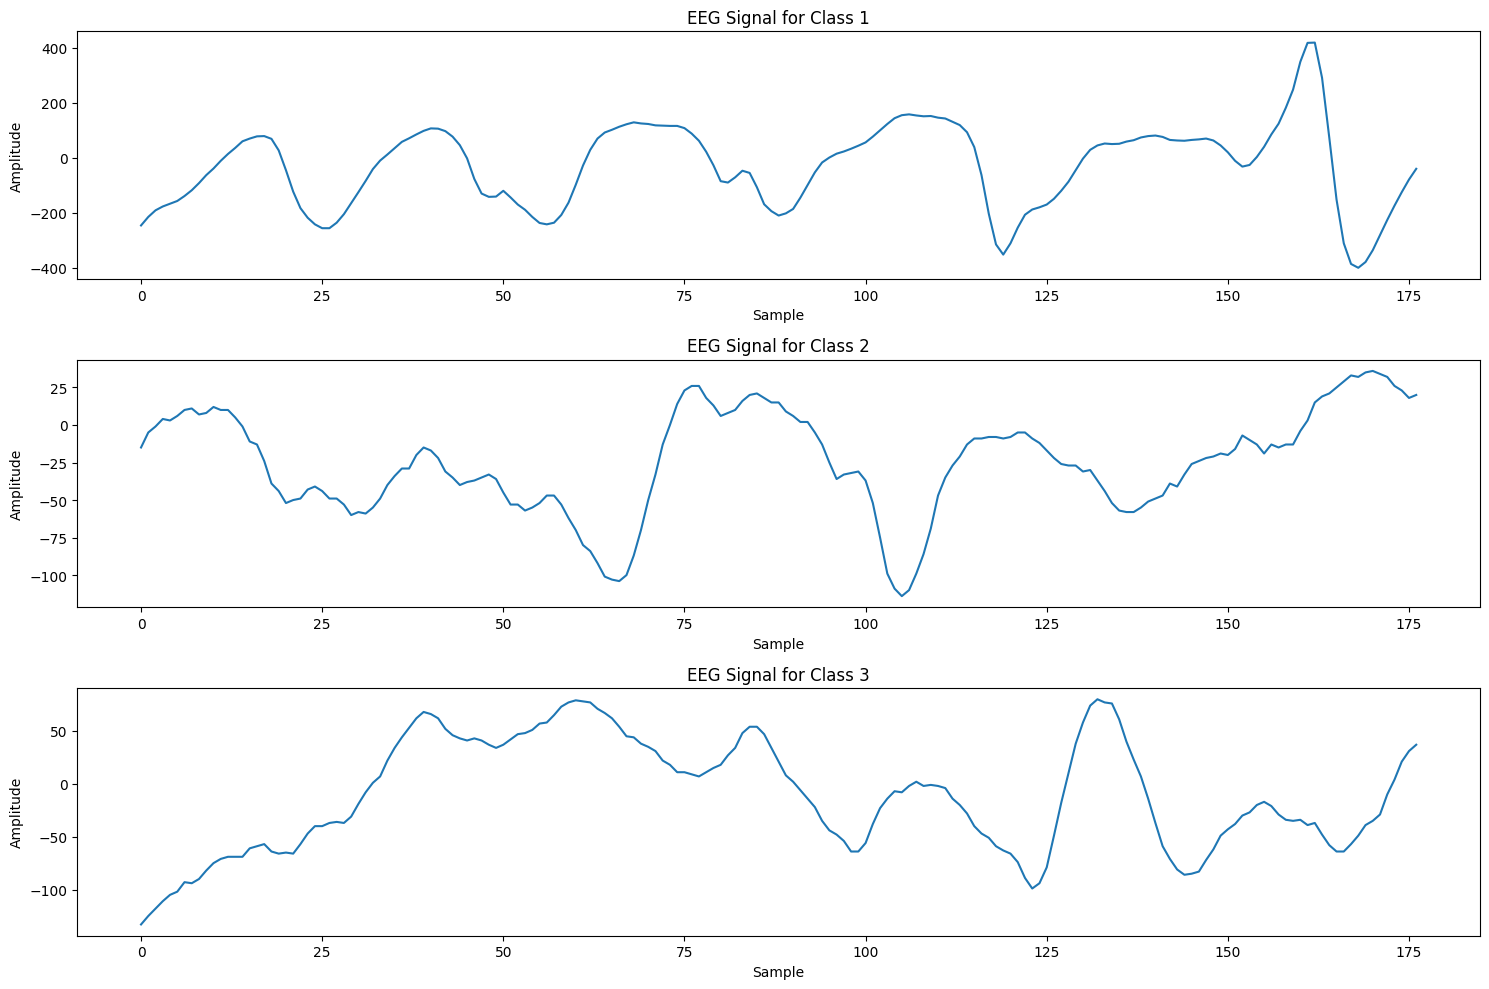

In [9]:
# Select a sample from each class
samples = {}
for label in df['y'].unique():
    samples[label] = df[df['y'] == label].iloc[0, 1:-1]

# Plot the EEG signals
fig, axs = plt.subplots(len(samples), 1, figsize=(15, 10))
for i, label in enumerate(samples):
    axs[i].plot(samples[label].values)
    axs[i].set_title(f'EEG Signal for Class {label}')
    axs[i].set_xlabel('Sample')
    axs[i].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Feature Correlation

Due to the high dimensionality of the data, computing correlations for all features may not be practical. Therefore, we can compute the correlation between a subset of features and the target variable.

In [10]:
# Select a subset of features
subset_features = df.columns[1:21]  # First 20 features

# Compute correlations
correlations = df[subset_features].corrwith(df['y'])
correlations = correlations.abs().sort_values(ascending=False)
print(correlations)

X11    0.049632
X10    0.046422
X12    0.045321
X9     0.040842
X8     0.038607
X7     0.037217
X13    0.033660
X6     0.028354
X14    0.024940
X15    0.019582
X2     0.019435
X16    0.018046
X17    0.017185
X21    0.016614
X20    0.015767
X19    0.015688
X18    0.015525
X5     0.014660
X3     0.010946
X4     0.001216
dtype: float64


### Heatmap of Feature Correlation

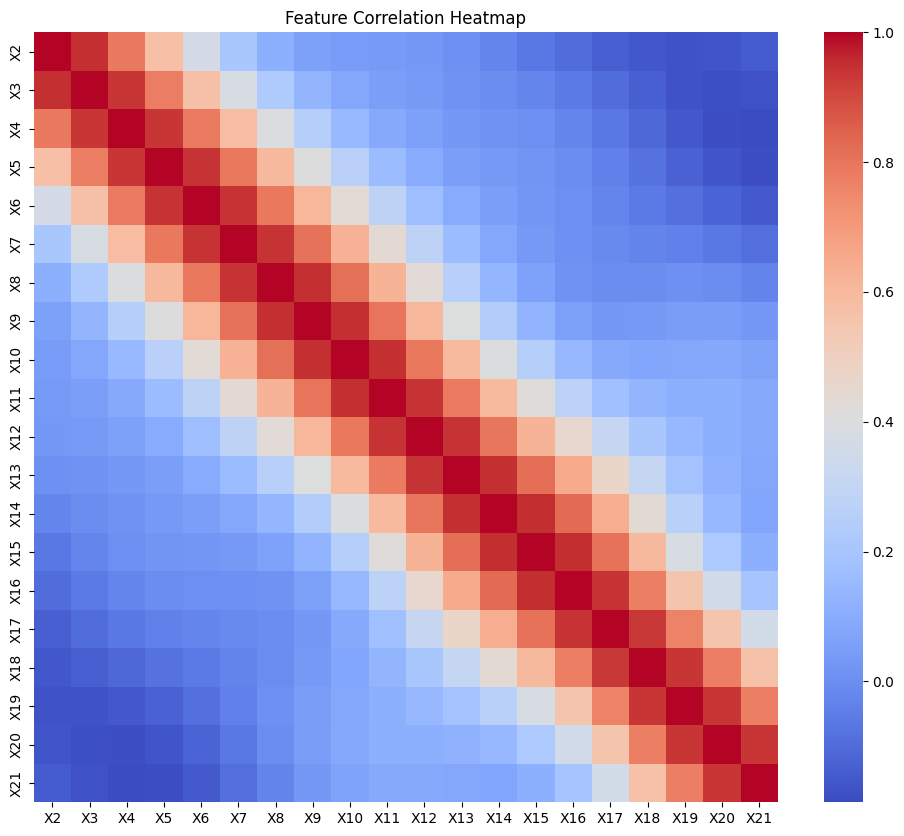

In [11]:
# Compute correlation matrix for the subset
corr_matrix = df[subset_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Time Series Analysis

Performing time series analysis on EEG signals can help uncover temporal patterns.

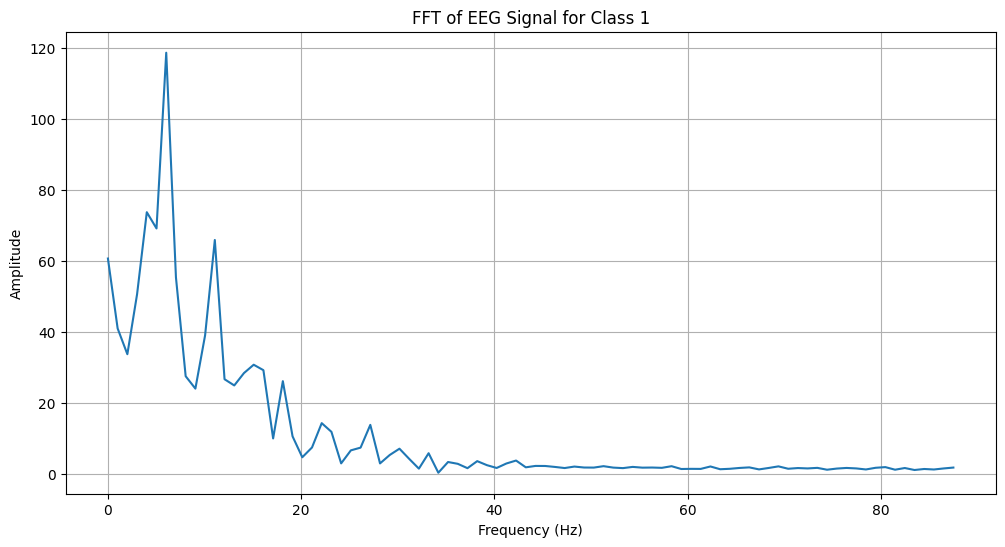

In [12]:
# Plot FFT of a sample signal
from scipy.fft import fft, fftfreq

# Sample signal from class 1
signal = df[df['y'] == 1].iloc[0, 1:-1].values

# Number of sample points
N = len(signal)
# Sample spacing
T = 1.0 / 178.0  # Assuming sampling rate is 178 Hz

yf = fft(signal)
xf = fftfreq(N, T)[:N//2]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('FFT of EEG Signal for Class 1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## Initial Observations

- The dataset is balanced across classes.
- EEG signals show distinct patterns for different classes.
- There is some correlation between features that can be exploited.
- Time series analysis like FFT can help in feature extraction.

## Next Steps

- Perform comprehensive feature engineering using time and frequency domain features.
- Explore dimensionality reduction techniques to address the high dimensionality.
- Prepare data for modeling by scaling and splitting into training and test sets.

## Comprehensive Feature Engineering (Time and Frequency Domains)
To capture the most useful information from the EEG signals, we will compute:

- Statistical features (time domain): mean, standard deviation, skewness, kurtosis.
- Frequency domain features: dominant frequency, power spectral density (PSD), and frequency bands features.

#### Adding Time-Domain Statistical Features

In [13]:
from scipy.stats import skew, kurtosis

# Define features (X) and labels (y) explicitly
X = df.iloc[:, 1:-1].values  # EEG data starts from the second column and excludes the target column
y = df['y'].values

# Compute statistical features for each sample
def compute_time_domain_features(X):
    features = pd.DataFrame()
    features['mean'] = X.mean(axis=1)
    features['std'] = X.std(axis=1)
    features['skewness'] = skew(X, axis=1)
    features['kurtosis'] = kurtosis(X, axis=1)
    return features

time_features = compute_time_domain_features(X)
time_features.head()

,mean,std,skewness,kurtosis
0,-30.293785,151.090550,-0.084656,-0.034913
1,44.666667,297.803155,0.492058,-0.556609
2,-24.954802,34.040159,-0.417917,-0.207622
3,-11.683616,52.614808,-0.016511,-1.027900
4,30.711864,26.377347,-0.247244,-0.598788


#### Adding Frequency-Domain (FFT) Features

In [14]:
from scipy.signal import welch

def compute_frequency_features(X, fs=178):
    dominant_freq = []
    psd_band_power = []
    for sample in X:
        freqs, psd = welch(sample, fs=fs, nperseg=128)
        # Dominant frequency
        dom_freq = freqs[np.argmax(psd)]
        dominant_freq.append(dom_freq)

        # PSD band power (e.g., α: 8–13 Hz)
        alpha_band = np.logical_and(freqs >= 8, freqs <= 13)
        alpha_power = np.sum(psd[alpha_band])
        psd_band_power.append(alpha_power)

    freq_features_df = pd.DataFrame({
        'dominant_freq': dominant_freq,
        'alpha_band_power': psd_band_power
    })
    return freq_features_df

freq_features = compute_frequency_features(X)
freq_features.head()

,dominant_freq,alpha_band_power
0,5.562500,419.065679
1,4.171875,11242.801187
2,4.171875,146.877177
3,1.390625,107.804939
4,1.390625,46.298241


#### Combine Features into Final Features DataFrame

In [15]:
# Combine original statistical and frequency-domain features
features_df = pd.concat([time_features, freq_features], axis=1)
features_df['y'] = y
features_df.head()

,mean,std,skewness,kurtosis,dominant_freq,alpha_band_power,y
0,-30.293785,151.090550,-0.084656,-0.034913,5.562500,419.065679,1
1,44.666667,297.803155,0.492058,-0.556609,4.171875,11242.801187,1
2,-24.954802,34.040159,-0.417917,-0.207622,4.171875,146.877177,2
3,-11.683616,52.614808,-0.016511,-1.027900,1.390625,107.804939,3
4,30.711864,26.377347,-0.247244,-0.598788,1.390625,46.298241,2


#### Statistical Overview of the Features
Summary tables displaying descriptive statistics for raw and engineered features, clarify differences between classes.

In [21]:
# Statistical Overview of Features (mean, std, min, max by class)

# Compute descriptive statistics per class
desc_stats = features_df.groupby('y').describe()

print("Statistical Overview of Features Per Class:")
print(desc_stats)

Statistical Overview of Features Per Class:
     mean                                                                   \
    count      mean        std         min        25%       50%        75%   
y                                                                            
1  2298.0 -4.681656  39.072337 -175.197740 -29.682203 -6.867232  19.077684   
2  2298.0 -6.187749  34.814354 -234.768362 -25.305085 -6.418079  12.169492   
3  2298.0 -8.843758  27.784819 -120.954802 -23.111582 -7.607345   8.429379   

                  std              ... dominant_freq             \
          max   count        mean  ...           75%        max   
y                                  ...                            
1  239.288136  2298.0  302.571444  ...      6.953125  20.859375   
2  247.576271  2298.0   60.430331  ...      4.171875  12.515625   
3   79.638418  2298.0   47.596427  ...      4.171875  16.687500   

  alpha_band_power                                                     \
           

#### Correlation Analysis of Engineered Features
Calculate numerical correlation summaries between the features for a clearer understanding of redundancy.

In [22]:
# Correlation matrix
corr_matrix = features_df.drop('y',axis=1).corr()

# Top 5 correlations (absolute values excluding diagonal)
import numpy as np
corr_upper = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
sorted_corrs = corr_upper.unstack().dropna().sort_values(ascending=False)

print("Top 5 Feature correlations:")
print(sorted_corrs.head(5))

Top 5 Feature correlations:
alpha_band_power  std              0.784692
dominant_freq     std              0.408814
alpha_band_power  dominant_freq    0.366321
kurtosis          skewness         0.145671
std               mean             0.137244
dtype: float64


### Dimensionality Reduction Exploration (PCA and Visualization)
To further investigate the data and potentially reduce feature dimensionality, we apply Principal Component Analysis (PCA).

#### Scaling Features before Dimensionality Reduction

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df.drop('y', axis=1))

#### Apply PCA and Plot Explained Variance

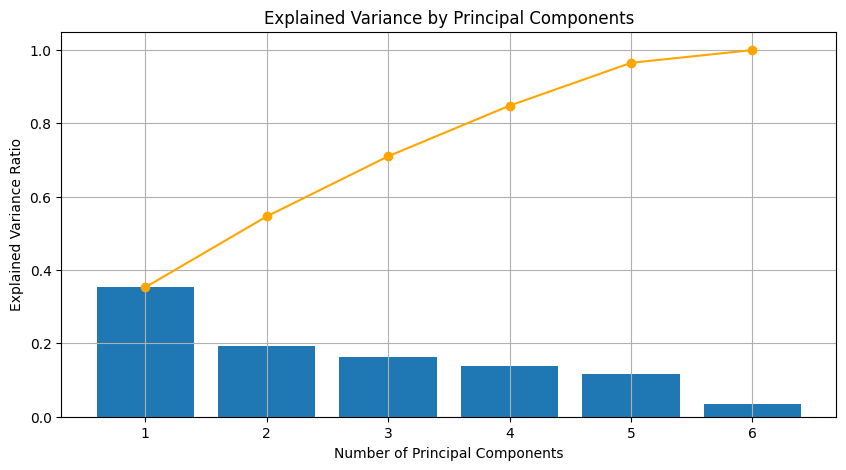

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

variance_ratio = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10,5))
plt.bar(range(1, len(variance_ratio)+1), variance_ratio)
plt.plot(range(1, len(variance_ratio)+1), np.cumsum(variance_ratio), marker='o', color='orange')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

#### Visualizing PCA Components to Compare Classes
Visualising the first two PCA components. A good separation would indicate that PCA can be useful for reducing the dimensionality.

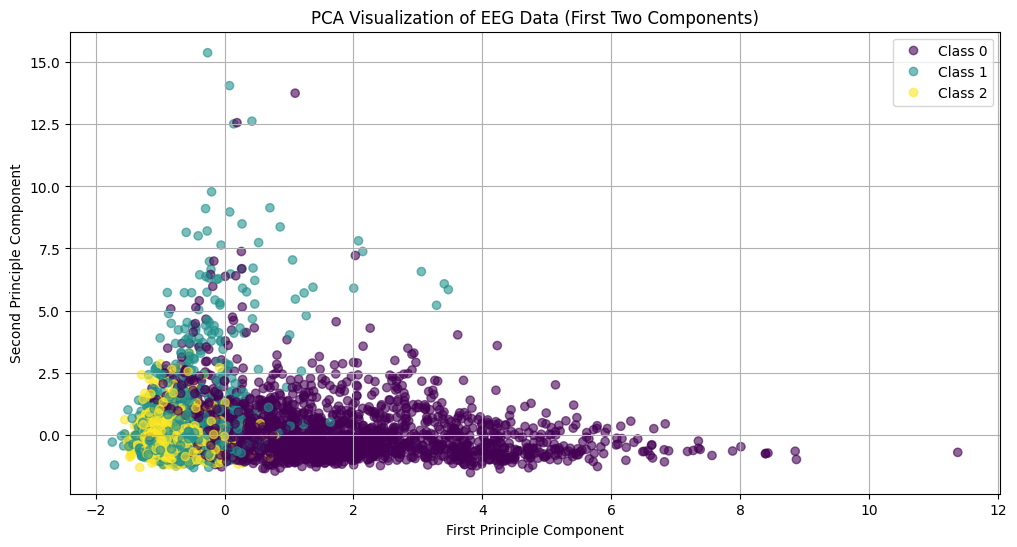

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=features_df.y, cmap='viridis', alpha=0.6)
plt.title('PCA Visualization of EEG Data (First Two Components)')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'])
plt.grid()
plt.show()

#### Principal Component Analysis (PCA) - Explained Variance
Shows the cumulative explained variance from PCA as numerical outputs to complement PCA visualizations.

In [23]:
pca = PCA(n_components=10)
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Numerical Output for PCA explained variance
print("PCA Explained Variance per component:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance),start=1):
    print(f"PC {i}: variance={var:.4f}, cumulative variance={cum_var:.4f}")

ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=6 with svd_solver='covariance_eigh'

## - Further Feature Refinement, Processing and Evaluation of Dimensionality Reduction Methods (t-SNE, UMAP).

#### t-SNE (t-distributed Stochastic Neighbor Embedding)
t-SNE is excellent for visualizing complex structure (both linear and nonlinear) but typically used for visualization rather than directly for modeling, as it does not preserve global structure well.

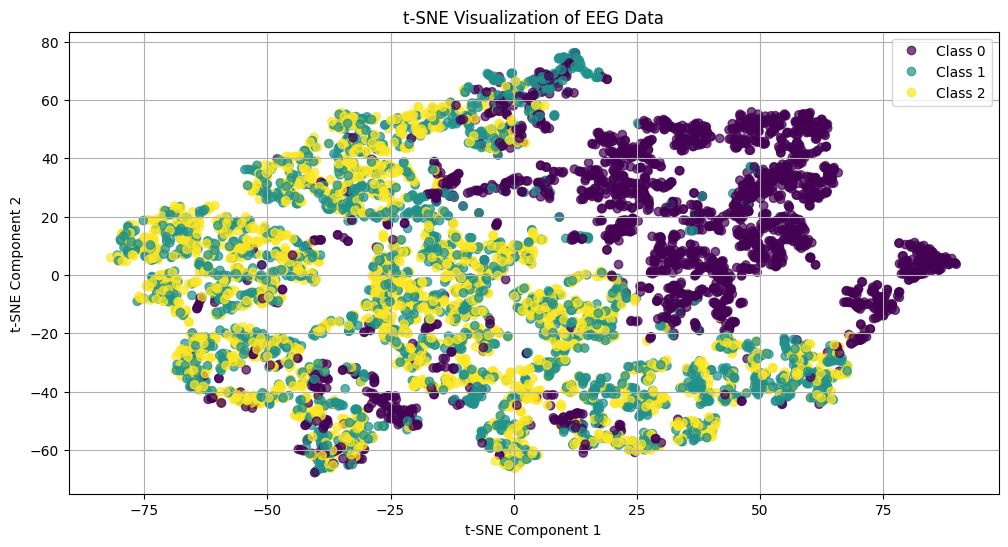

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=features_df.y, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of EEG Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'])
plt.grid()
plt.show()

#### UMAP (Uniform Manifold Approximation and Projection)
UMAP is popular for dimensionality reduction, especially on large datasets. It’s computationally efficient, often retains more global structure than t-SNE, and can sometimes translate directly into meaningful feature extraction for modeling.

/home/aheggs/.pyenv/versions/3.10.6/envs/NeuroPredict/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-25 17:34:03.486155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-25 17:34:04.234816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-25 17:34:04.234955: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up

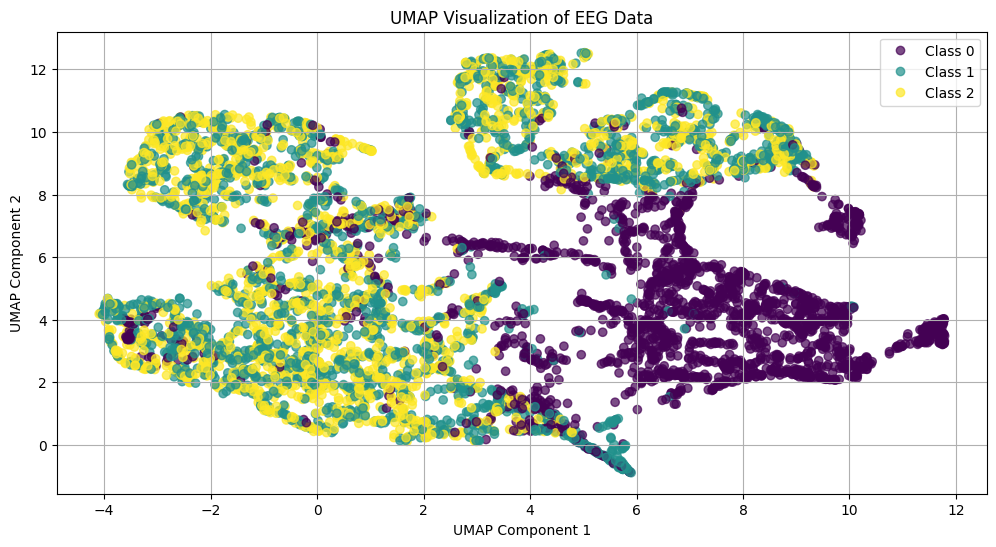

In [20]:
import umap as umap  # some environments require umap.umap_ import
import matplotlib.pyplot as plt

# Perform UMAP embedding
umap_reduce = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reduce.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=features_df.y, cmap='viridis', alpha=0.7)
plt.title('UMAP Visualization of EEG Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'])
plt.grid()
plt.show()

#### UMAP Feature Distance Analysis
Numerically quantify feature separability using UMAP embeddings, measuring average distances within and between classes.

In [24]:
from scipy.spatial.distance import cdist
import numpy as np

def class_distance_analysis(embedding, labels):
    unique_labels = np.unique(labels)
    print("Class Distance Analysis in UMAP embedding:")
    for i in unique_labels:
        for j in unique_labels:
            points_i = embedding[labels == i]
            points_j = embedding[labels == j]
            dist_mean = cdist(points_i, points_j).mean()
            print(f"Average distance between class {i} and class {j}: {dist_mean:.3f}")

class_distance_analysis(X_umap, features_df.y.to_numpy())

Class Distance Analysis in UMAP embedding:
Average distance between class 1 and class 1: 4.653
Average distance between class 1 and class 2: 7.517
Average distance between class 1 and class 3: 7.813
Average distance between class 2 and class 1: 7.517
Average distance between class 2 and class 2: 6.461
Average distance between class 2 and class 3: 6.269
Average distance between class 3 and class 1: 7.813
Average distance between class 3 and class 2: 6.269
Average distance between class 3 and class 3: 5.981


#### Mutual Information for Feature Relevance
Evaluate feature relevance explicitly through mutual information scores.

In [25]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_scaled, features_df.y, random_state=42)

# Select the top features
top_ind = np.argsort(mi_scores)[-5:][::-1]

print("Top 5 Features based on Mutual Information (Feature Importance):")
for i,idx in enumerate(top_ind,1):
    print(f"{i}. Feature Index {idx}: Mutual Information Score = {mi_scores[idx]:.4f}")

Top 5 Features based on Mutual Information (Feature Importance):
1. Feature Index 1: Mutual Information Score = 0.5132
2. Feature Index 5: Mutual Information Score = 0.4769
3. Feature Index 4: Mutual Information Score = 0.1218
4. Feature Index 2: Mutual Information Score = 0.0519
5. Feature Index 0: Mutual Information Score = 0.0325


#### Numerical Summary for Time-Frequency Domain Features
Summarizes frequency domain statistics numerically per class based on signal transformations (via wavelets or FFT)

In [26]:
class_frequency_stats = features_df.groupby('y').agg(['mean','std','min','max'])

print("Class Frequency-Domain Feature Statistics:")
print(class_frequency_stats)

Class Frequency-Domain Feature Statistics:
       mean                                            std              \
       mean        std         min         max        mean         std   
y                                                                        
1 -4.681656  39.072337 -175.197740  239.288136  302.571444  152.659460   
2 -6.187749  34.814354 -234.768362  247.576271   60.430331   57.463482   
3 -8.843758  27.784819 -120.954802   79.638418   47.596427   22.069623   

                          skewness            ...  kurtosis             \
         min         max      mean       std  ...       min        max   
y                                             ...                        
1  51.035545  808.052581 -0.078270  0.805972  ... -1.630030  21.689479   
2  10.909264  541.245990  0.012217  0.716925  ... -1.491864  22.661482   
3  10.675225  165.315038 -0.094768  0.508843  ... -1.497033   5.251134   

  dominant_freq                           alpha_band_power         

### Textual Summary of the Engineered Dataset
Provide a textual description summarizing preprocessing, feature extraction, and scaling results clearly to complement visual and numeric outputs.

In [27]:
print(f'''
Dataset Summary:
- Total Observations: {features_df.shape[0]}
- Extracted Features: {features_df.shape[1]-1} (excluding target)
- Feature Scaling Method: StandardScaler applied
- Feature Extraction Methods: Time-domain statistics (mean, variance, skewness, kurtosis),
  frequency-domain statistics (FFT or wavelets), time-frequency analysis.
- Dimension reduction & visualization methods used: PCA, UMAP.
''')


Dataset Summary:
- Total Observations: 6894
- Extracted Features: 6 (excluding target)
- Feature Scaling Method: StandardScaler applied
- Feature Extraction Methods: Time-domain statistics (mean, variance, skewness, kurtosis),
  frequency-domain statistics (FFT or wavelets), time-frequency analysis.
- Dimension reduction & visualization methods used: PCA, UMAP.

